In [38]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

#**Algoritmo de Metropolis**
En este proyecto se implementa el algoritmo de Metropolis para el modelo de Ising en los casos 1d y 2d. El algoritmo se basa en interpretar el ratio $\frac{p_i}{p_j} = e^{-\beta (E_i-E_j)}$ como la probabilidad de ir del estado $i$ al estado $j$, y se puede resumir en los siguientes pasos:

1. Seleccionar un microestado inicial aleatoriamente.
2. Hacer un pequeño cambio en el estado del sistema: si $\Delta E$ < 0 aceptar el cambio, sino aceptarlo con una probabilidad $p = e^{-\beta \Delta E} $
3. Repetir el paso número 2 hasta alcanzar el equilibrio
4. Calcular el promedio de las magnitudes físicas después de alcanzar el equilibrio.

En este programa definimos el criterio de equilibrio por una cantidad de pasos que varia según la dimensión que estemos trabajando. El "pequeño" cambio en el sistema lo definimos como cambiar la orientación de N spines seleccionados de manera aleatoria.

## **Modelo de Ising 1D**
La interacción entre vecinos más cercanos para el modelo de Ising unidemensional con condiciones de frontera periódicas está dada por:
$$E = -J\sum \limits_{i=1}^{N} \sigma_i \sigma_{i+1}-B \sum \limits_{i=1}^{N} \sigma_i  $$
con $\sigma _{N+1} = \sigma_1 $ y $B$ un campo magnético externo aplicado.

Se sabe que para este caso no hay transición de fase y que la magnetización promedio está dada por:

$$ \frac{\langle M⟩}{N} = \frac{\mu \ \text{sinh}(\beta \mu B)}{\sqrt{e^{-4\beta J}+\sinh^2(\beta \mu B)}}$$

Implementaremos el algoritmo de metropolis para este sistema y graficaremos la magnetización en función del campo magnético externo para distintos valores de temperatura.
Trabajeremos con un sistema de unidades apropiado tal que $k_B=J=\mu = 1$.

In [39]:
#Parametros que se pueden variar para disminuir el tiempo de ejecución del programa o aumentar la precisión en los resultados obtenidos

n = 80 #número de valores de campo magnético
N = 25 #número de spines
equilibrium = 1024 #número de pasos para alcanzar el equilibrio
steps = 1024 # número de pasos después de alcanzar el equilibrio.
E,M,C,X = np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n)

In [40]:
def exactM(T,B): #Magnetización analítica
  beta = 1/T
  return np.sinh(beta*B)/np.sqrt(np.exp(-4*beta)+np.sinh(beta*B)**2)

def initialize1(N): #Inicializar la configuración
  return np.random.choice([-1, 1], size=N)

def Metropolis1(config, beta,B): #Make a trial change in the microstate
  for i in range(N):
    a = np.random.randint(0, N)
    dE = 2*config[a]*(config[(a+1)%N] + config[(a-1)%N] + B)
    if dE < 0:
        config[a] *= -1
    elif rand() < np.exp(-dE*beta):
        config[a] *= -1
  return config

def Energy1(sigma,B): #Compute the energy for the configuration
  E = 0
  for i in range (len(sigma)):
    E += -sigma[i]*(sigma[(i+1)%N]+B)
  return E

def Mag(config): #Compute the magnetización for the configuration
    mag = np.sum(config)
    return mag

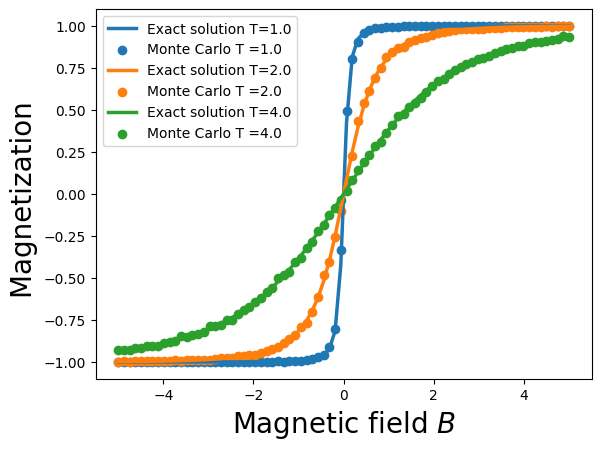

In [41]:
#Implementación del algoritmo de metropolis para distintos valores de B y T.
B = np.linspace(-5, 5, n)
Temperatures = np.array([1,2,4])

for T in Temperatures:
  for b in range(n):
    E1 = 0
    M1 = 0
    E2 = 0
    M2 = 0
    config = initialize1(N)
    beta=1.0/T
    beta2=beta**2

    for i in range(equilibrium):         # Llevar la configuración inicial al equilibrio
      Metropolis1(config, beta,B[b])

    for i in range(steps):              # Caminata aleatoria entorno al equilibrio en el espacio de fases
      Metropolis1(config, beta,B[b])
      ene = Energy1(config,0)
      mag = Mag(config)
      E1 += ene
      M1 += mag
      M2 += mag**2
      E2 += ene**2

#Compute the averages
    E[b] = E1/steps
    M[b] = M1/(steps*N)
    C[b] = (E2/(steps*N)-E1**2/(steps**2*N))*beta2
    X[b] = (M2/(steps*N)-M1**2/(steps**2*N))*beta

#Plot results
  plt.plot(B,exactM(T,B),linewidth = 2.5 ,label='Exact solution T={}'.format(1/beta))
  plt.scatter(B, M, marker='o', label = 'Monte Carlo T ={}'.format(1/beta))
  plt.xlabel("Magnetic field $B$", fontsize=20)
  plt.ylabel("Magnetization ", fontsize=20)
  plt.axis('tight')
  plt.legend()

Vemos que para T = 0, la magnetización en función de $B$ tiende a -1 si $B<0$ o 1 si $B>0$, para todo valor de B.

# **Ising model in 2D**

En el caso bidimensional, la energía de la configuración de $N\times N$ spines con condiciones de frontera periódicas en presencia de un campo magnético externo $B$ está dada por:

$$E=-J\sum_{i=1}^{N}\sum_{j=1}^{N}σ_{ij}(σ_{i+1,j}+σ_{i,j+1})-μB\sum_{i=1}^{N}\sum_{j=1}^{N}σ_{ij}$$

Cuando $B=0$, este sistema exhibe una transición de fase de segundo orden cuando cruza la temperatura crítica $T_c = \frac{2}{\ln (1+\sqrt2)} \approx 2.269$.

Para $T<T_c$ el sistema se encuentra en una fase ordenada, donde $\frac{\langle M⟩}{N} \neq 0 $ alcanzando el valor de $\pm 1$ cuando $T \rightarrow 0$, mientras que $\frac{\langle M⟩}{N} = 0$ para $T>T_c$. Cerca del punto crítico tenemos los siguientes comportamientos para el calor específico, la susceptibilidad magnética y la magnetización:



$$\frac{C}{N} \sim - \ln\frac{|T_c-T|}{T_c}$$


$$\chi \sim \left| \frac{T_c-T }{T_c}\right|^{-7/4}$$

$$\frac{\langle M⟩}{N} \sim \left( \frac{T_c-T}{T_c} \right)^{1/8} \text{para } \ T<T_c$$

Implementaremos el algoritmo de metropolis para el caso de campo externo nulo y graficaremos las magnitudes físicas en función de la temperatura, para observar la transición de fase de segundo orden.

In [42]:
#Parameters, varirlos según se quiera rapidez o precisión en los resultados

B = 0  #Campo externo
n = 80 #Número de temperaturas
N = 10 #Dimensión del arreglo NxN

equilibrium = 10000 #Pasos para alcanzar el equilibrio
steps = 2000 #Número de muestras

T = np.linspace(0.1, 4.5, n) #Arreglo de temperaturas
E,M,C,X = np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n) #Magnitudes físicas a calcular

In [43]:
def initialize2(N):
  return np.random.choice([-1, 1], size=(N, N))

def Metropolis2(config, beta,B):
  for i in range(N**2):
    a = np.random.randint(0, N)
    b = np.random.randint(0, N)
    dE = 2*config[a, b]*(config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N + B])
    if dE < 0:
        config[a, b] *= -1
    elif rand() < np.exp(-dE*beta):
        config[a, b] *= -1
  return config

def Energy2(sigma,B):
  E = 0
  for i in range (len(sigma)):
    for j in range (len(sigma)):
      E += -sigma[i,j]*(sigma[(i+1)%N,j]+sigma[i,(j+1)%N] + B)
  return E

In [46]:
#Implemeentación del algoritmo de metropolis al modelo de Ising bidimensional para distintos valores de temperatura a campo externo 0
for t in range(n):
  E1 = 0
  M1 = 0
  E2 = 0
  M2 = 0
  config = initialize2(N)
  beta=1.0/T[t]
  beta2=beta**2

  for i in range(equilibrium):         # equilibrate
    Metropolis2(config, beta,0)

  for i in range(steps):              #take data
    Metropolis2(config, beta,0)
    ene = Energy2(config,0)
    mag = Mag(config)
    E1 += ene
    M1 += mag
    M2 += mag**2
    E2 += ene**2

  E[t] = E1/steps
  M[t] = M1/(steps*N**2)
  C[t] = (E2/(steps*N**2)-E1**2/(steps**2*N**2))*beta2
  X[t] = (M2/(steps*N**2)-M1**2/(steps**2*N**2))*beta

(-0.12000000000000002, 4.72, -1.6063791577299353, 33.733962312328636)

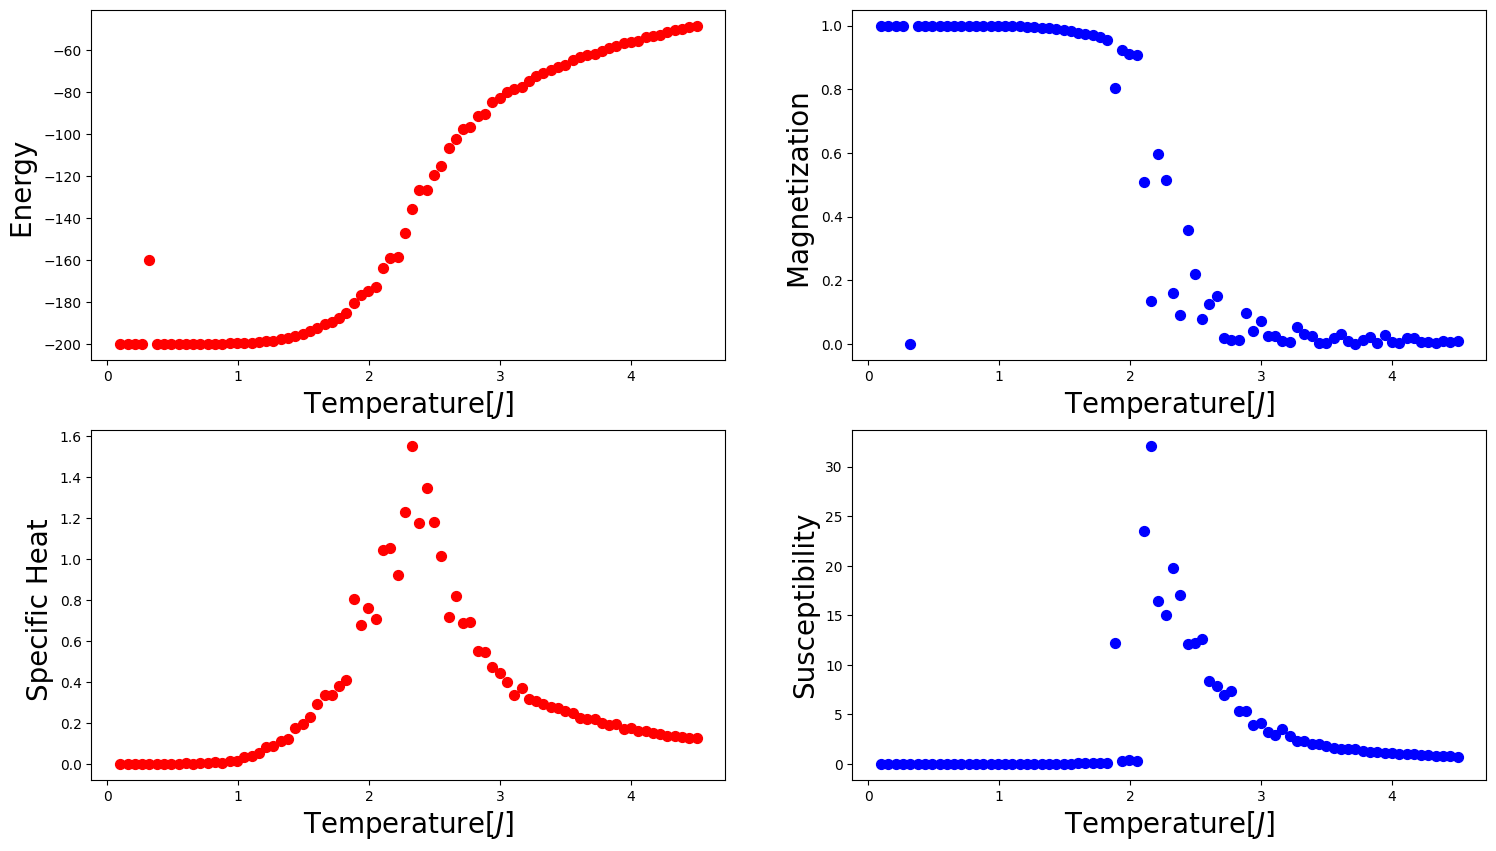

In [47]:
#Graficar los resultados
f = plt.figure(figsize=(18, 10))

sp =  f.add_subplot(2, 2, 1 )
plt.scatter(T, E, s=50, marker='o', color='red')
plt.xlabel("Temperature[$J$]", fontsize=20)
plt.ylabel("Energy ", fontsize=20)
plt.axis('tight')

sp =  f.add_subplot(2, 2, 2 )
plt.scatter(T, abs(M), s=50, marker='o', color='blue')
plt.xlabel("Temperature$[J]$", fontsize=20)
plt.ylabel("Magnetization ", fontsize=20)
sp.set_ylim(0, 1.2)
plt.axis('tight')

sp =  f.add_subplot(2, 2, 3 )
plt.scatter(T, C, s=50, marker='o', color='red')
plt.xlabel("Temperature$[J]$", fontsize=20)
plt.ylabel("Specific Heat ", fontsize=20)
plt.axis('tight')

sp =  f.add_subplot(2, 2, 4 )
plt.scatter(T, X, s=50, marker='o', color='blue')
plt.xlabel("Temperature$[J]$", fontsize=20)
plt.ylabel("Susceptibility", fontsize=20)
plt.axis('tight')

# Densidad de energía en función de la frecuencia

Tenemos la densidad de energía en función de la frecuencia dada por
$$\rho (\omega) = \frac{V \hbar \omega ^3}{c^3 \pi ^2}e^{-\frac{\hbar \omega}{kT}}$$

Del cálculo sabemos que la frecuencia para la cual le densidad alcanza su valor máximo satisface $$\frac{\partial \rho }{\partial \omega}= 0.$$
Así:

$$\frac{\partial \rho }{\partial \omega} = 0 \implies \left(3\omega ^2 - \frac{\hbar}{kT}\omega^3 \right)e^{-\frac{\hbar \omega}{kT}} = 0 \\ \implies \omega \left( \frac{3kT}{\hbar} -\omega \right) = 0$$

Como $\frac{\partial \rho }{\partial \omega} > 0 \ $ para $ \ \omega < 0 \ $ y $ \ 0<\omega < \frac{3kT}{\hbar}$, $\omega = 0$ corresponde a un punto de silla, mientras que $ \omega = \frac{3kT}{\hbar}$ corresponde a un máximo local.

Como $\rho (\omega)$ tiene el comportamiento asintótico:


$$ \rho (\omega) → -\infty  \ \ \text{as} \ \ \omega \rightarrow -\infty  $$
$$ \rho (\omega) → 0  \ \ \text{as} \ \ \omega \rightarrow \infty  $$

$ω = \frac{3kT}{\hbar} $ corresponde a la frecuencia para el cual la densidad de energía alcanza su valor máximo.